# Image Sorter

## Designed for image workflows with high volume and multiple image types

## Sorting images save time in pre-production & production 

# Setup

## Imports

In [28]:
import os
import os.path
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image

from scipy import ndimage

from time import sleep
from numpy import random
import requests

In [29]:
def stop_clock():
  if (time.time() - start_time) < 60:
    print("--- %s seconds ---" % (time.time() - start_time))
  else:
    print("--- {} minutes {} seconds ---".format((int((time.time() - start_time)/60)),((time.time() - start_time)%60)))



## Load Images

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


uint8
(50, 50, 3)


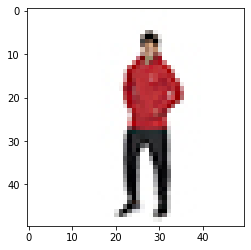

In [ ]:
data = image.imread('/content/drive/My Drive/Thinkful Assignments/ProductImages50px/2466335_University_Red_White.jpg')
print(data.dtype)
print(data.shape)
pyplot.imshow(data)
pyplot.show()

In [ ]:
drive_path = '/content/drive/My Drive/Thinkful Assignments/ProductImages50px/'
drive_path2 = '/content/drive/My Drive/Thinkful Assignments/ProductImages1000/'

Working with 2008 images
Image examples: 
3860631_Scarlet_Floral.jpg


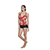

3860652_Charcoal.jpg


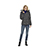

In [ ]:
folder = "/content/drive/My Drive/Thinkful Assignments/ProductImages50px/"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {} images".format(len(onlyfiles)))
print("Image examples: ")

for i in range(40, 42):
    print(onlyfiles[i])
    display(_Imgdis(filename=folder + "/" + onlyfiles[i], width=200, height=200))

## Convert Images to Dataframe

In [ ]:
#load images as dictonary of NumPy arrays
loaded_images = {}
loaded_images_gray = {}
filenames = os.listdir(drive_path)
#filenames.remove('.ipynb_checkpoints')
for filename in filenames:
	# load image
	img = Image.open(drive_path + filename).convert('L')
	img_data_gray = np.array(img)
 
	img_data = image.imread(drive_path + filename)
	
	# store loaded image
	loaded_images[filename] = img_data
	loaded_images_gray[filename] = img_data_gray
 

In [ ]:
#Convert rgb to dataframe
start_time = time.time()  


images_df = pd.DataFrame()
processed = 0

for k in loaded_images.keys():
  indexer = 0
  data = {}
  column_names = []
  for a in range (0,loaded_images[k].shape[0]):
    for b in range (0,loaded_images[k].shape[1]):
      data.update({'r{}'.format(indexer) : [int(loaded_images[k][a][b][0])], 'g{}'.format(indexer) : [int(loaded_images[k][a][b][1])], 'b{}'.format(indexer) : [int(loaded_images[k][a][b][2])]})
      column_names.append('r{}'.format(indexer))
      column_names.append('g{}'.format(indexer))
      column_names.append('b{}'.format(indexer))
      indexer +=1
  image_df = pd.DataFrame (data, columns=column_names)
  image_df['filename'] = k
  images_df = images_df.append(image_df)
  processed +=1
  if processed%50 == 0:
    print('Images processed = {} : {}% complete'.format(processed, int((processed/len(loaded_images.keys()))*100)))

images_df = images_df.set_index(images_df['filename'])  
stop_clock()


Images processed = 50 : 2% complete
Images processed = 100 : 4% complete
Images processed = 150 : 7% complete
Images processed = 200 : 9% complete
Images processed = 250 : 12% complete
Images processed = 300 : 14% complete
Images processed = 350 : 17% complete
Images processed = 400 : 19% complete
Images processed = 450 : 22% complete
Images processed = 500 : 24% complete
Images processed = 550 : 27% complete
Images processed = 600 : 29% complete
Images processed = 650 : 32% complete
Images processed = 700 : 34% complete
Images processed = 750 : 37% complete
Images processed = 800 : 39% complete
Images processed = 850 : 42% complete
Images processed = 900 : 44% complete
Images processed = 950 : 47% complete
Images processed = 1000 : 49% complete
Images processed = 1050 : 52% complete
Images processed = 1100 : 54% complete
Images processed = 1150 : 57% complete
Images processed = 1200 : 59% complete
Images processed = 1250 : 62% complete
Images processed = 1300 : 64% complete
Images pro

In [ ]:
#Convert to grayscale dataframe
images_gray_df = pd.DataFrame()

start_time = time.time()
processed = 0


for k in loaded_images_gray.keys():
  indexer = 0
  data = {}
  column_names = []
  for a in range (0,loaded_images_gray[k].shape[0]):
    for b in range (0,loaded_images_gray[k].shape[1]):
      data.update({'px{}'.format(indexer) : [int(loaded_images_gray[k][a][b])]})
      column_names.append('px{}'.format(indexer))      
      indexer +=1
  image_gray_df = pd.DataFrame (data, columns=column_names)
  image_gray_df['filename'] = k
  images_gray_df = images_gray_df.append(image_gray_df)
  processed +=1
  if processed%50 == 0:
    print('Images processed = {} : {}% complete'.format(processed, int((processed/len(loaded_images_gray.keys()))*100)))

images_gray_df = images_gray_df.set_index(images_gray_df['filename'])  
stop_clock()

Images processed = 50 : 2% complete
Images processed = 100 : 4% complete
Images processed = 150 : 7% complete
Images processed = 200 : 9% complete
Images processed = 250 : 12% complete
Images processed = 300 : 14% complete
Images processed = 350 : 17% complete
Images processed = 400 : 19% complete
Images processed = 450 : 22% complete
Images processed = 500 : 24% complete
Images processed = 550 : 27% complete
Images processed = 600 : 29% complete
Images processed = 650 : 32% complete
Images processed = 700 : 34% complete
Images processed = 750 : 37% complete
Images processed = 800 : 39% complete
Images processed = 850 : 42% complete
Images processed = 900 : 44% complete
Images processed = 950 : 47% complete
Images processed = 1000 : 49% complete
Images processed = 1050 : 52% complete
Images processed = 1100 : 54% complete
Images processed = 1150 : 57% complete
Images processed = 1200 : 59% complete
Images processed = 1250 : 62% complete
Images processed = 1300 : 64% complete
Images pro

In [ ]:
compression_opts = dict(method='zip', archive_name='productimages50px-rgb.csv')  
images_df.to_csv('productimages50px-rgb_csv.zip', index=False, compression=compression_opts)

compression_opts = dict(method='zip', archive_name='productimages50px-gry.csv')  
images_gray_df.to_csv('productimages50px-gry_csv.zip', index=False, compression=compression_opts)

## Load from CSV

In [11]:
path = "/Users/minimac/Documents/Thinkful/Capstone3/productimages50px-rgb.csv"
images_df = pd.read_csv(path)
path = "/Users/minimac/Documents/Thinkful/Capstone3/productimages50px-gry.csv"
images_gray_df = pd.read_csv(path)                      

images_df = images_df.set_index(images_df['filename'])
images_gray_df = images_gray_df.set_index(images_gray_df['filename'])


In [30]:
images_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2008 entries, 3857585_Sky_Blue.jpg to 3003484_Light_Armory_Blue.jpg
Columns: 7500 entries, r0 to b2499
dtypes: int64(7500)
memory usage: 114.9+ MB


In [13]:
images_df.head()

,r0,g0,b0,r1,g1,b1,r2,g2,b2,r3,...,r2497,g2497,b2497,r2498,g2498,b2498,r2499,g2499,b2499,filename
filename,,,,,,,,,,,,,,,,,,,,,
3857585_Sky_Blue.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857585_Sky_Blue.jpg
3857627_Night_Sangria_Nep.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Night_Sangria_Nep.jpg
3857627_Gray_Nep.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Gray_Nep.jpg
3857627_Navy_Paisley.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Navy_Paisley.jpg
3857627_Green_Shine.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Green_Shine.jpg


In [14]:
images_gray_df.head()

,px0,px1,px2,px3,px4,px5,px6,px7,px8,px9,...,px2491,px2492,px2493,px2494,px2495,px2496,px2497,px2498,px2499,filename
filename,,,,,,,,,,,,,,,,,,,,,
3857585_Sky_Blue.jpg,255,255,255,255,255,255,255,255,255,251,...,255,255,255,255,255,255,255,255,255,3857585_Sky_Blue.jpg
3857627_Night_Sangria_Nep.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Night_Sangria_Nep.jpg
3857627_Gray_Nep.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Gray_Nep.jpg
3857627_Navy_Paisley.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Navy_Paisley.jpg
3857627_Green_Shine.jpg,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,3857627_Green_Shine.jpg


# Grayscale

## Setup data

In [ ]:
images_gray_df = images_gray_df.drop(columns='filename')

In [58]:
#X = images_df
X = images_gray_df


X_std = X.div(255)


## Dimension reduction

### t-SNE Tuning

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2008 samples in 0.548s...
[t-SNE] Computed neighbors for 2008 samples in 25.867s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 1.365586
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.481766
[t-SNE] KL divergence after 1000 iterations: 1.072523
--- 37.68653130531311 seconds ---


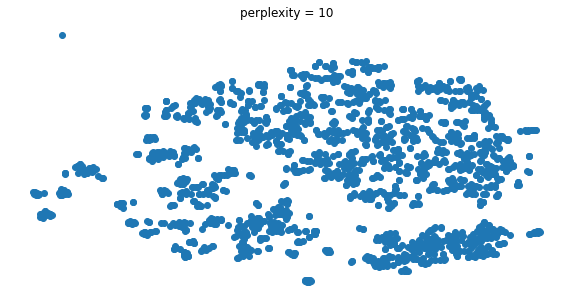

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2008 samples in 0.744s...
[t-SNE] Computed neighbors for 2008 samples in 25.983s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 1.638853
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.210823
[t-SNE] KL divergence after 1000 iterations: 1.036123
--- 39.24705743789673 seconds ---


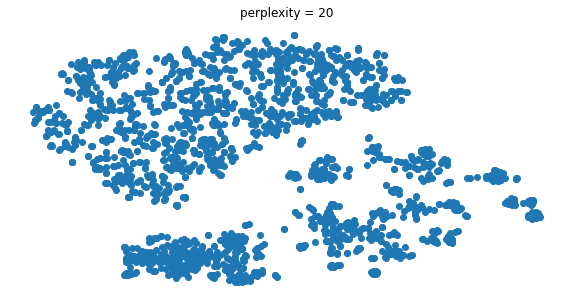

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2008 samples in 0.733s...
[t-SNE] Computed neighbors for 2008 samples in 26.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 1.809214
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.804932
[t-SNE] KL divergence after 1000 iterations: 0.994503
--- 41.760361671447754 seconds ---


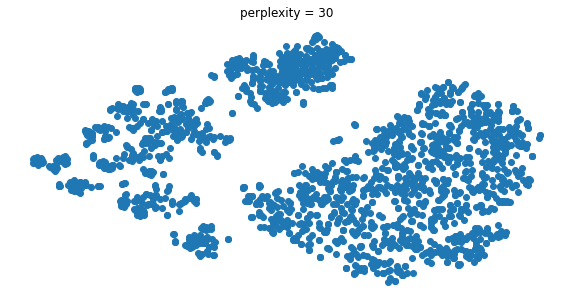

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2008 samples in 0.736s...
[t-SNE] Computed neighbors for 2008 samples in 26.336s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 1.943422
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.963242
[t-SNE] KL divergence after 1000 iterations: 0.957280
--- 43.051687240600586 seconds ---


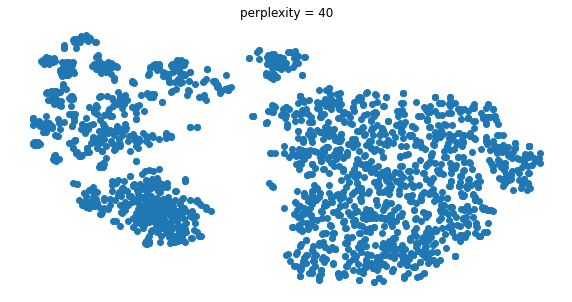

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2008 samples in 0.751s...
[t-SNE] Computed neighbors for 2008 samples in 26.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 2.058337
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.483017
[t-SNE] KL divergence after 1000 iterations: 0.914690
--- 45.44361710548401 seconds ---


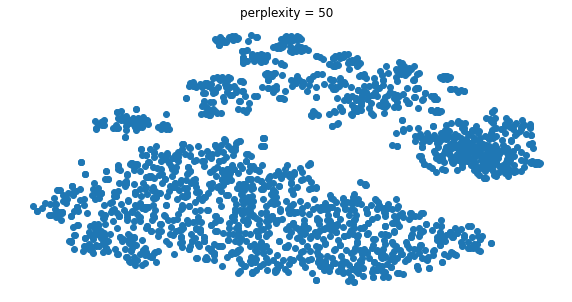

In [ ]:
for i in range (10,60,10):
  start_time = time.time()

  tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=1000)
  tsne_results = tsne.fit_transform(X_std)

  stop_clock()

  plt.figure(figsize=(10,5))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.title('perplexity = {}'.format(i))
  plt.show()

In [ ]:
tsne_opt = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
X_tsne = tsne_opt.fit_transform(X_std)
X_tsne10 = TSNE(n_components=10, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_std)
X_tsne50 = TSNE(n_components=50, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2008 samples in 0.513s...
[t-SNE] Computed neighbors for 2008 samples in 25.965s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 1.943422
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.962227
[t-SNE] KL divergence after 1000 iterations: 0.952761


### UMAP Tuning


--- 26.455445289611816 seconds ---


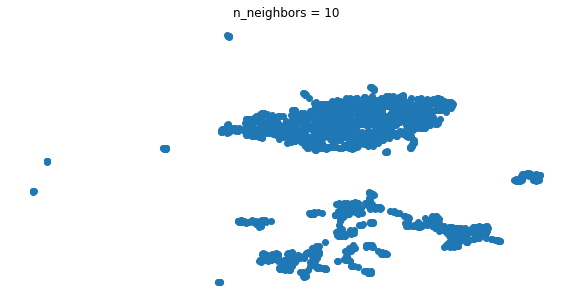

--- 27.957780838012695 seconds ---


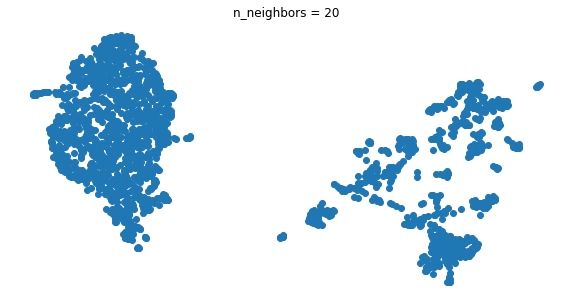

--- 28.776994943618774 seconds ---


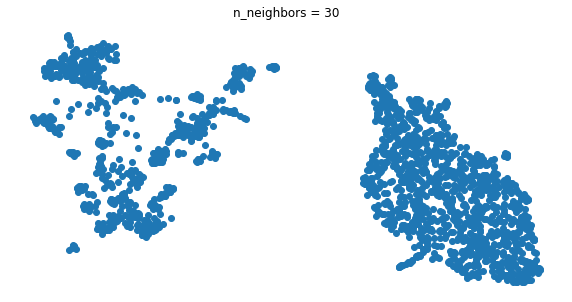

--- 28.842630863189697 seconds ---


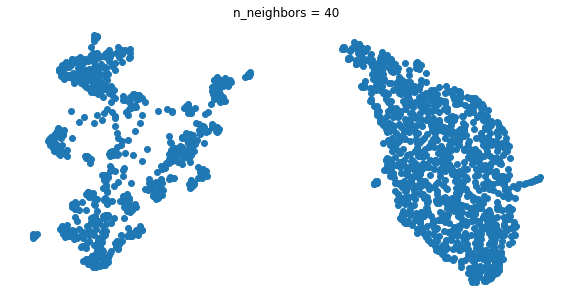

--- 28.728004217147827 seconds ---


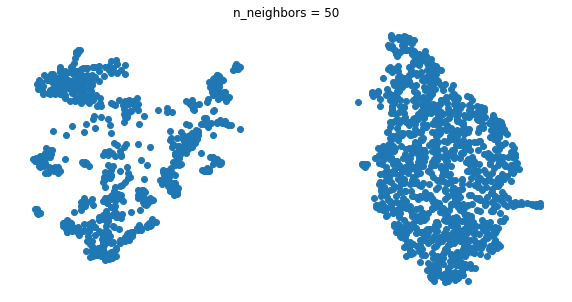

--- 29.604286909103394 seconds ---


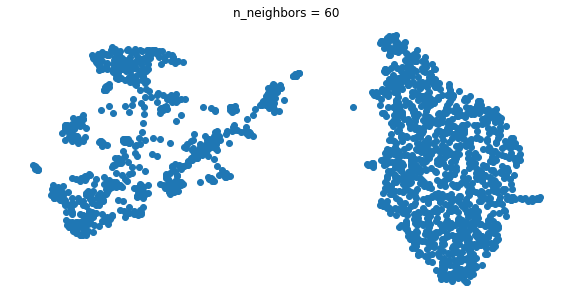

--- 29.53987145423889 seconds ---


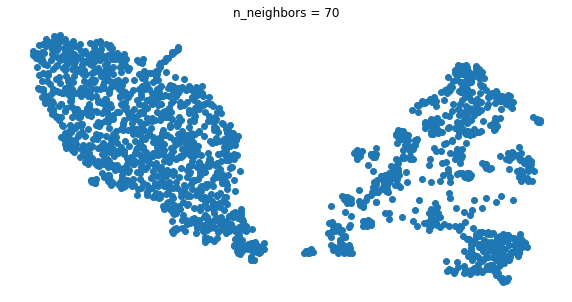

--- 29.779404401779175 seconds ---


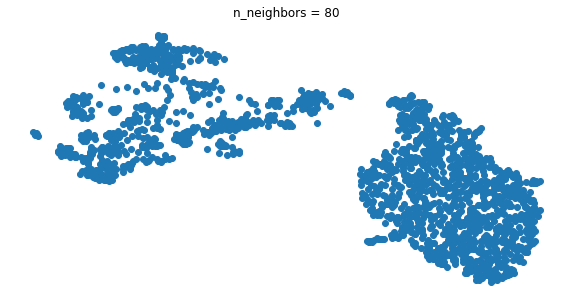

--- 29.96061897277832 seconds ---


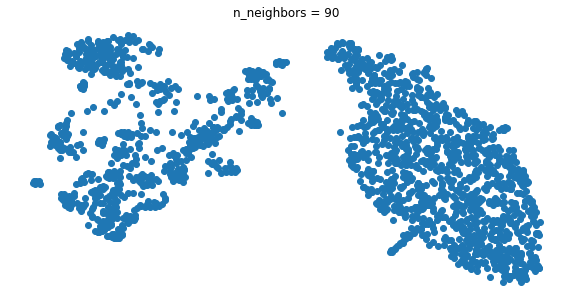

--- 30.804208517074585 seconds ---


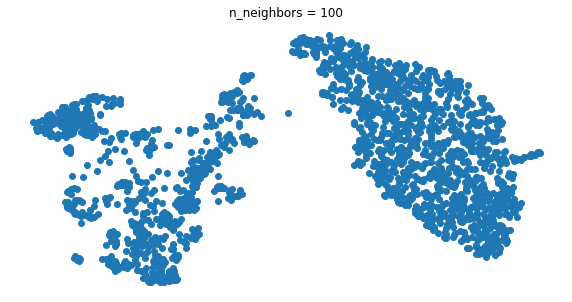

--- 30.37786078453064 seconds ---


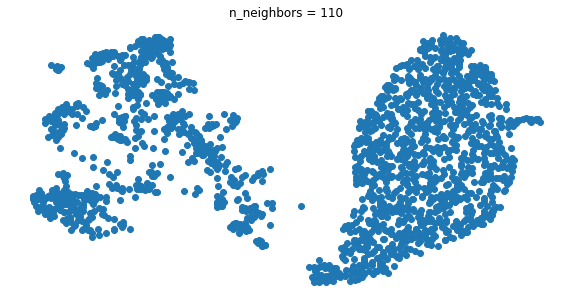

--- 30.95306897163391 seconds ---


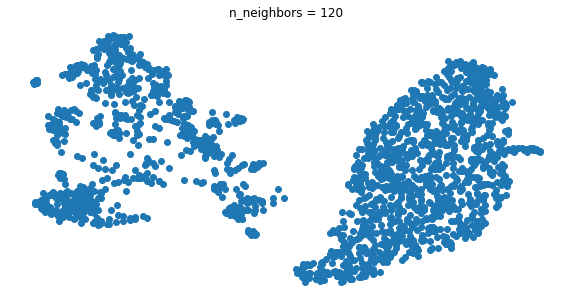

--- 30.640833854675293 seconds ---


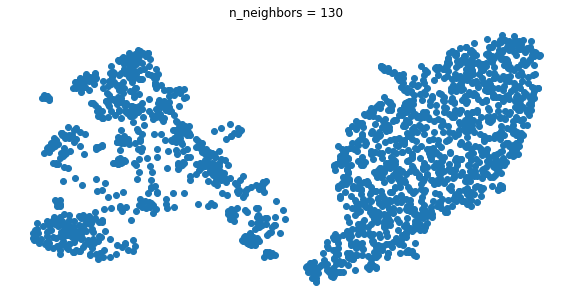

--- 31.903346300125122 seconds ---


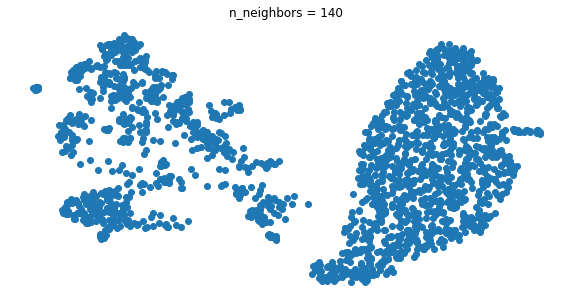

--- 31.457217931747437 seconds ---


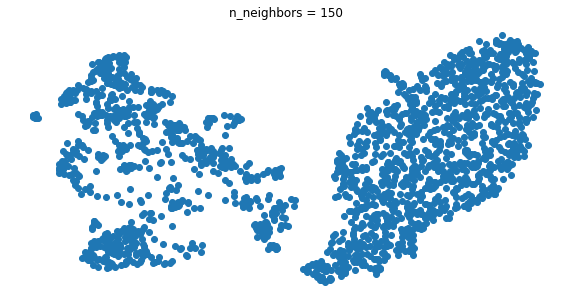

--- 31.1850368976593 seconds ---


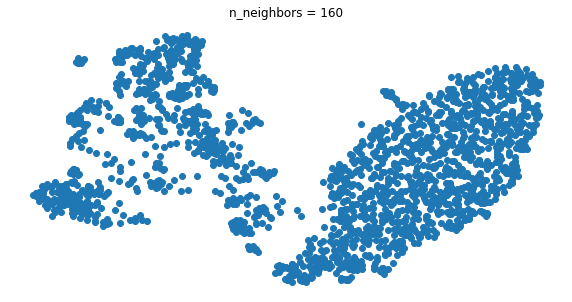

--- 31.593353509902954 seconds ---


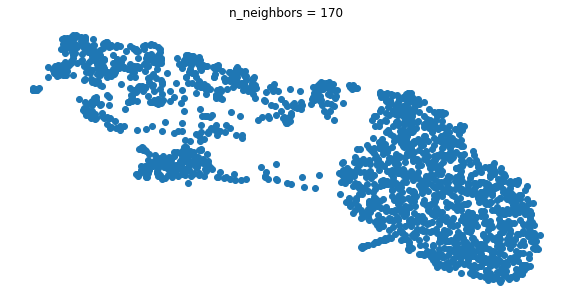

--- 31.453291654586792 seconds ---


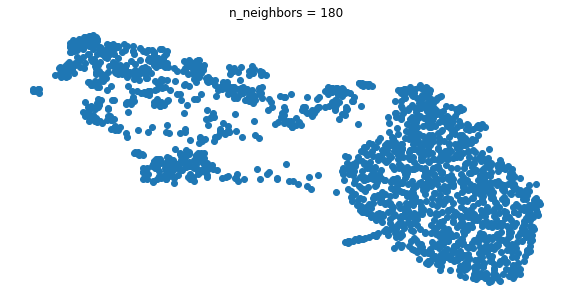

--- 32.21181845664978 seconds ---


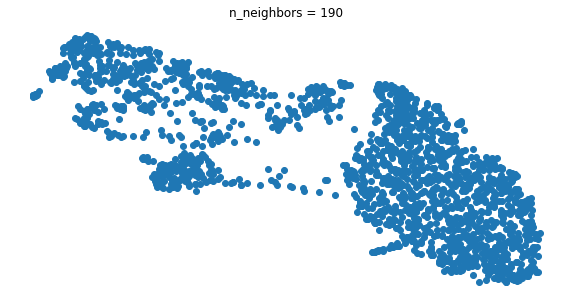

--- 31.634926319122314 seconds ---


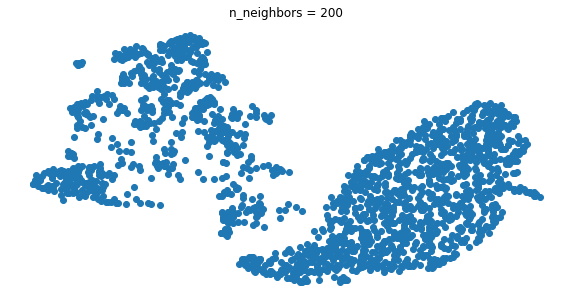

--- 32.013909101486206 seconds ---


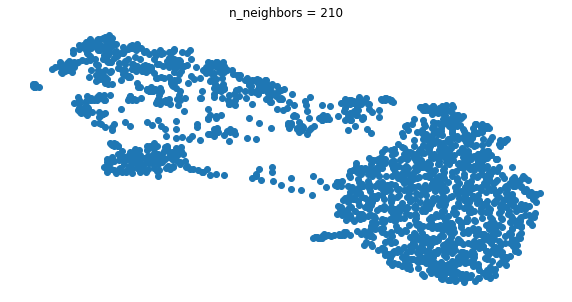

--- 31.980562210083008 seconds ---


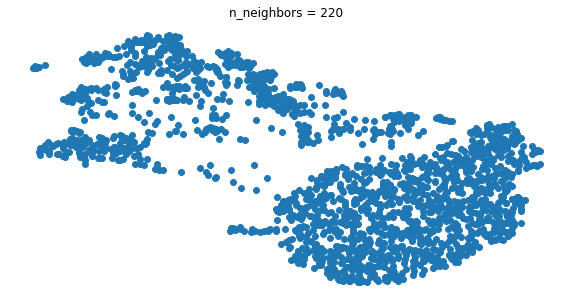

--- 32.46139192581177 seconds ---


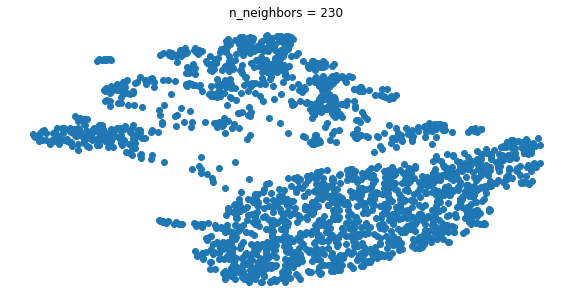

--- 32.53759956359863 seconds ---


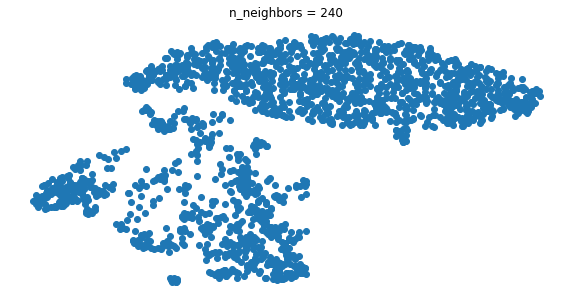

In [ ]:
for i in range (10,250,10):
  start_time = time.time()

  umap_results = umap.UMAP(n_neighbors=i, min_dist=0.3, metric='correlation').fit_transform(X_std)

  stop_clock()

  plt.figure(figsize=(10,5))
  plt.scatter(umap_results[:, 0], umap_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.title('n_neighbors = {}'.format(i))
  plt.show()

In [59]:
X_umap = umap.UMAP(n_neighbors=140, min_dist=0.3, metric='correlation').fit_transform(X_std)
X_umap10 = umap.UMAP(n_neighbors=140, min_dist=0.3, n_components=10, metric='correlation').fit_transform(X_std)
X_umap50 = umap.UMAP(n_neighbors=140, min_dist=0.3, n_components=50, metric='correlation').fit_transform(X_std)

## Model testing

### DBSCAN

All pixels

In [ ]:
for i in range (2,5):
  for j in range (5,10):
    dbscan_cluster = DBSCAN(eps=i, min_samples=j)
    db_clusters = dbscan_cluster.fit_predict(X_std)
    print("eps = {}, min samples = {}".format(i,j))
    print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std, db_clusters, metric='euclidean')))

eps = 2, min samples = 5
The silhouette score of the DBSCAN solution: -0.2066816880575245
eps = 2, min samples = 6
The silhouette score of the DBSCAN solution: -0.2060593384707689
eps = 2, min samples = 7
The silhouette score of the DBSCAN solution: -0.20857535062574098
eps = 2, min samples = 8
The silhouette score of the DBSCAN solution: -0.20857535062574098
eps = 2, min samples = 9
The silhouette score of the DBSCAN solution: -0.2042419210259868
eps = 3, min samples = 5
The silhouette score of the DBSCAN solution: -0.17180800679829156
eps = 3, min samples = 6
The silhouette score of the DBSCAN solution: -0.18023646717792718
eps = 3, min samples = 7
The silhouette score of the DBSCAN solution: -0.1840647070238461
eps = 3, min samples = 8
The silhouette score of the DBSCAN solution: -0.18328086396903773
eps = 3, min samples = 9
The silhouette score of the DBSCAN solution: -0.1763052033309617
eps = 4, min samples = 5
The silhouette score of the DBSCAN solution: -0.1594009292009393
eps =

In [ ]:
dbscan_cluster_opt = DBSCAN(eps=2, min_samples=7)
db_clusters_opt = dbscan_cluster_opt.fit_predict(X_std)
print("Number of clusters with best settings is: {}".format(len(np.unique(db_clusters_best))))

Number of clusters with best settings is: 7


t-SNE

In [ ]:
for i in range (2,5):
  for j in range (5,10):
    dbscan_cluster = DBSCAN(eps=i, min_samples=j)
    db_clusters = dbscan_cluster.fit_predict(X_tsne)
    print("eps = {}, min samples = {}".format(i,j))
    print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_tsne, db_clusters, metric='euclidean')))

eps = 2, min samples = 5
The silhouette score of the DBSCAN solution: 0.13283708691596985
eps = 2, min samples = 6
The silhouette score of the DBSCAN solution: 0.11197315901517868
eps = 2, min samples = 7
The silhouette score of the DBSCAN solution: 0.007462684530764818
eps = 2, min samples = 8
The silhouette score of the DBSCAN solution: -0.09483107179403305
eps = 2, min samples = 9
The silhouette score of the DBSCAN solution: -0.23264695703983307
eps = 3, min samples = 5
The silhouette score of the DBSCAN solution: 0.1189764142036438
eps = 3, min samples = 6
The silhouette score of the DBSCAN solution: 0.29736918210983276
eps = 3, min samples = 7
The silhouette score of the DBSCAN solution: 0.27480030059814453
eps = 3, min samples = 8
The silhouette score of the DBSCAN solution: 0.26757100224494934
eps = 3, min samples = 9
The silhouette score of the DBSCAN solution: 0.26447808742523193
eps = 4, min samples = 5
The silhouette score of the DBSCAN solution: 0.0499202124774456
eps = 4, 

In [ ]:
dbscan_cluster_tsne = DBSCAN(eps=3, min_samples=8)
db_clusters_tsne = dbscan_cluster_tsne.fit_predict(X_tsne)
print("Number of clusters with best settings is: {}".format(len(np.unique(db_clusters_tsne))))

Number of clusters with best settings is: 14


UMAP

In [ ]:
for i in range (2,10):
  dbscan_cluster = DBSCAN(eps=2, min_samples=i)
  db_clusters = dbscan_cluster.fit_predict(X_umap)
  print("min samples = {}".format(i))
  print("The silhouette score of the DBSCAN with UMAP solution: {}".format(metrics.silhouette_score(X_umap, db_clusters, metric='euclidean')))

min samples = 2
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 3
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 4
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 5
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 6
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 7
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 8
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 9
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335


In [ ]:
dbscan_cluster_umap = DBSCAN(eps=4, min_samples=9)
db_clusters_umap = dbscan_cluster_tsne.fit_predict(X_umap)
print("Number of clusters with best settings is: {}".format(len(np.unique(db_clusters_umap))))

Number of clusters with best settings is: 1


### Agglomerative Clustering

In [127]:
for i in range (2,10):
  pred = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=i).fit_predict(X_std)
  print("The silhoutte score for {} clusters Agglomerative Clustering solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering solution: 0.46759572312800274
The silhoutte score for 3 clusters Agglomerative Clustering solution: 0.10336895268528737
The silhoutte score for 4 clusters Agglomerative Clustering solution: 0.10009099141209565
The silhoutte score for 5 clusters Agglomerative Clustering solution: 0.10970093834257459
The silhoutte score for 6 clusters Agglomerative Clustering solution: 0.10738009431040076
The silhoutte score for 7 clusters Agglomerative Clustering solution: 0.10722304931355266
The silhoutte score for 8 clusters Agglomerative Clustering solution: 0.14125105779984265
The silhoutte score for 9 clusters Agglomerative Clustering solution: 0.13114464146799154


In [123]:
for i in range (2,10):
  pred = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=i).fit_predict(X_std)
  print("The silhoutte score for {} clusters Agglomerative Clustering solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering solution: 0.4759757313325048
The silhoutte score for 3 clusters Agglomerative Clustering solution: 0.4638850131789392
The silhoutte score for 4 clusters Agglomerative Clustering solution: 0.4397082792335533
The silhoutte score for 5 clusters Agglomerative Clustering solution: 0.4382959556261652
The silhoutte score for 6 clusters Agglomerative Clustering solution: 0.4332921155272411
The silhoutte score for 7 clusters Agglomerative Clustering solution: 0.3952258023608884
The silhoutte score for 8 clusters Agglomerative Clustering solution: 0.3705125707254008
The silhoutte score for 9 clusters Agglomerative Clustering solution: 0.4047995977494831


In [126]:
for i in range (2,10):
  pred = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=i).fit_predict(X_std)
  print("The silhoutte score for {} clusters Agglomerative Clustering solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering solution: 0.3807814998007279
The silhoutte score for 3 clusters Agglomerative Clustering solution: 0.14041612315775145
The silhoutte score for 4 clusters Agglomerative Clustering solution: 0.1362221726089751
The silhoutte score for 5 clusters Agglomerative Clustering solution: 0.11687472916464338
The silhoutte score for 6 clusters Agglomerative Clustering solution: 0.10386601574988846
The silhoutte score for 7 clusters Agglomerative Clustering solution: 0.10798820255567489
The silhoutte score for 8 clusters Agglomerative Clustering solution: 0.10227905568843089
The silhoutte score for 9 clusters Agglomerative Clustering solution: 0.10605438871973188


t-SNE

In [125]:
for i in range (2,10):
  pred = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=i).fit_predict(X_tsne)
  print("The silhoutte score for {} clusters Agglomerative Clustering with t-SNE solution: {}".format(i, metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering with t-SNE solution: 0.4668799042701721
The silhoutte score for 3 clusters Agglomerative Clustering with t-SNE solution: 0.3784690201282501
The silhoutte score for 4 clusters Agglomerative Clustering with t-SNE solution: 0.3978153467178345
The silhoutte score for 5 clusters Agglomerative Clustering with t-SNE solution: 0.3969133198261261
The silhoutte score for 6 clusters Agglomerative Clustering with t-SNE solution: 0.34678584337234497
The silhoutte score for 7 clusters Agglomerative Clustering with t-SNE solution: 0.3340132534503937
The silhoutte score for 8 clusters Agglomerative Clustering with t-SNE solution: 0.31724974513053894
The silhoutte score for 9 clusters Agglomerative Clustering with t-SNE solution: 0.2884659469127655


UMAP


In [124]:
for i in range (2,10):
  pred = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=i).fit_predict(X_umap)
  print("The silhoutte score for {} clusters Agglomerative Clustering with UMAP solution: {}".format(i, metrics.silhouette_score(X_umap, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering with UMAP solution: 0.3134019672870636
The silhoutte score for 3 clusters Agglomerative Clustering with UMAP solution: 0.19166654348373413
The silhoutte score for 4 clusters Agglomerative Clustering with UMAP solution: 0.27192360162734985
The silhoutte score for 5 clusters Agglomerative Clustering with UMAP solution: 0.1786121279001236
The silhoutte score for 6 clusters Agglomerative Clustering with UMAP solution: 0.14676566421985626
The silhoutte score for 7 clusters Agglomerative Clustering with UMAP solution: 0.11283227801322937
The silhoutte score for 8 clusters Agglomerative Clustering with UMAP solution: 0.06689857691526413
The silhoutte score for 9 clusters Agglomerative Clustering with UMAP solution: 0.04945287108421326


### GMM

In [ ]:
for i in range (2,15):
  pred = GaussianMixture(n_components=i, random_state=42).fit_predict(X_std)
  print("The silhoutte score for {} clusters GMM solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters GMM solution: 0.4182462304822179
The silhoutte score for 3 clusters GMM solution: 0.15876069090304148
The silhoutte score for 4 clusters GMM solution: 0.14899888014318052
The silhoutte score for 5 clusters GMM solution: 0.1088254877781895
The silhoutte score for 6 clusters GMM solution: 0.11152291051728236
The silhoutte score for 7 clusters GMM solution: 0.11623369864035471
The silhoutte score for 8 clusters GMM solution: 0.11525483891829753
The silhoutte score for 9 clusters GMM solution: 0.10701145023439887
The silhoutte score for 10 clusters GMM solution: 0.11824278218969143
The silhoutte score for 11 clusters GMM solution: 0.1115264538576369
The silhoutte score for 12 clusters GMM solution: 0.10589362165172043
The silhoutte score for 13 clusters GMM solution: 0.11836449972131423
The silhoutte score for 14 clusters GMM solution: 0.12345303329336513


In [ ]:
gmm_opt = GaussianMixture(n_components=2, random_state=42).fit_predict(X_std)
print("The silhoutte score for {} clusters GMM solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters GMM solution: 0.048222299865638744


In [ ]:
for i in range (2,15):
  pred = GaussianMixture(n_components=i, random_state=42).fit_predict(X_tsne)
  print("The silhoutte score for {} clusters GMM solution: {}".format(i, metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

The silhoutte score for 2 clusters GMM solution: 0.47221747040748596
The silhoutte score for 3 clusters GMM solution: 0.387667715549469
The silhoutte score for 4 clusters GMM solution: 0.43938905000686646
The silhoutte score for 5 clusters GMM solution: 0.4571530520915985
The silhoutte score for 6 clusters GMM solution: 0.4389565587043762
The silhoutte score for 7 clusters GMM solution: 0.4209349453449249
The silhoutte score for 8 clusters GMM solution: 0.3881475329399109
The silhoutte score for 9 clusters GMM solution: 0.39795002341270447
The silhoutte score for 10 clusters GMM solution: 0.4015824496746063
The silhoutte score for 11 clusters GMM solution: 0.3880888819694519
The silhoutte score for 12 clusters GMM solution: 0.349491149187088
The silhoutte score for 13 clusters GMM solution: 0.3332523703575134
The silhoutte score for 14 clusters GMM solution: 0.35558074712753296


In [ ]:
gmm_tsne = GaussianMixture(n_components=2, random_state=42).fit_predict(X_tsne)
print("The silhoutte score for {} clusters GMM solution: {}".format(i, metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

The silhoutte score for 2 clusters GMM solution: 0.35558074712753296


In [ ]:
for i in range (2,15):
  pred = GaussianMixture(n_components=i, random_state=42).fit_predict(X_umap)
  print("The silhoutte score for {} clusters GMM solution: {}".format(i, metrics.silhouette_score(X_umap, pred, metric='euclidean')))

The silhoutte score for 2 clusters GMM solution: 0.5757319927215576
The silhoutte score for 3 clusters GMM solution: 0.49170419573783875
The silhoutte score for 4 clusters GMM solution: 0.3320479094982147
The silhoutte score for 5 clusters GMM solution: 0.41976386308670044
The silhoutte score for 6 clusters GMM solution: 0.4094296395778656
The silhoutte score for 7 clusters GMM solution: 0.3970645070075989
The silhoutte score for 8 clusters GMM solution: 0.35879018902778625
The silhoutte score for 9 clusters GMM solution: 0.368548184633255
The silhoutte score for 10 clusters GMM solution: 0.3806948959827423
The silhoutte score for 11 clusters GMM solution: 0.4072859585285187
The silhoutte score for 12 clusters GMM solution: 0.4216407537460327
The silhoutte score for 13 clusters GMM solution: 0.37297260761260986
The silhoutte score for 14 clusters GMM solution: 0.3676748275756836


In [ ]:
gmm_umap = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap)
print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap, gmm_umap, metric='euclidean')))

The silhoutte score for the GMM solution: 0.5662223100662231


### KMeans

In [ ]:
for i in range (2,10):
  pred = KMeans(n_clusters=i, random_state=42, max_iter=1000).fit_predict(X_std)
  print("Silhouette score for {} cluster k-means: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))


Silhouette score for 2 cluster k-means: 0.4182462304822179
Silhouette score for 3 cluster k-means: 0.15876069090304148
Silhouette score for 4 cluster k-means: 0.15038559563706105
Silhouette score for 5 cluster k-means: 0.14554397284547235
Silhouette score for 6 cluster k-means: 0.14692644012911152
Silhouette score for 7 cluster k-means: 0.14254843896541736
Silhouette score for 8 cluster k-means: 0.14438608946807488
Silhouette score for 9 cluster k-means: 0.12266158551916152


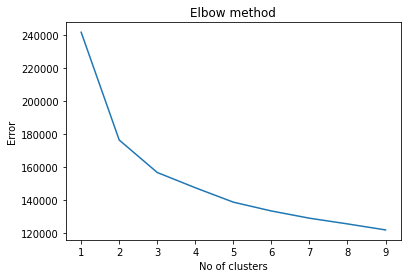

In [ ]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X_std)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_std)
print("Silhouette score k-means: {}".format(metrics.silhouette_score(X_std, pred, metric='euclidean')))

Silhouette score k-means: 0.15876069090304148


In [ ]:
pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_std)
print("Silhouette score k-means: {}".format(metrics.silhouette_score(X_std, pred, metric='euclidean')))


Silhouette score k-means: 0.4182462304822179


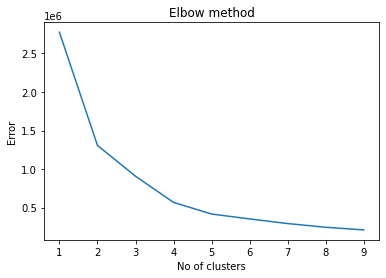

In [ ]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X_tsne)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_tsne)
print("Silhouette score k-means with t-SNE: {}".format(metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

Silhouette score k-means with t-SNE: 0.46136710047721863


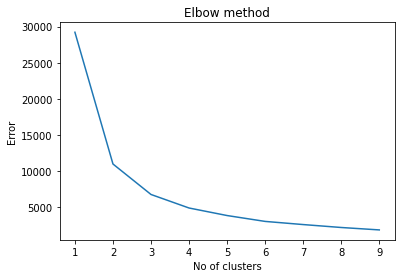

In [ ]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X_umap)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_umap)
print("Silhouette score k-means with UMAP: {}".format(metrics.silhouette_score(X_umap, pred, metric='euclidean')))

Silhouette score k-means with UMAP: 0.4937538504600525


## Best Predictors

In [60]:
agg_opt = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2).fit_predict(X_std)

gmm_umap = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap)



print("The silhoutte score for the Agglomerative solution: {}".format(metrics.silhouette_score(X_std, agg_opt, metric='euclidean')))
print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap, gmm_umap, metric='euclidean')))


The silhoutte score for the Agglomerative solution: 0.47597573133250487
The silhoutte score for the GMM solution: 0.5724294185638428


In [61]:
agg_umap10 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2).fit_predict(X_umap10)

gmm_umap10 = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap10)



print("The silhoutte score for the Agglomerative solution: {}".format(metrics.silhouette_score(X_umap10, agg_umap10, metric='euclidean')))
print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap10, gmm_umap10, metric='euclidean')))


The silhoutte score for the Agglomerative solution: 0.599149763584137
The silhoutte score for the GMM solution: 0.593238353729248


In [75]:
agg_umap50 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=3).fit_predict(X_umap50)

gmm_umap50 = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap50)


print("The silhoutte score for the Agglomerative solution: {}".format(metrics.silhouette_score(X_umap50, agg_umap50, metric='euclidean')))

print("Number of clusters with best settings is: {}".format(len(np.unique(gmm_umap50))))

print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap50, gmm_umap50, metric='euclidean')))


The silhoutte score for the Agglomerative solution: 0.4600718915462494
Number of clusters with best settings is: 2
The silhoutte score for the GMM solution: 0.6140348315238953


### Create lists of file groupings AGG

In [63]:
filenameIndex = images_df.index

In [64]:
agg_preds = {}
i = 0
for file in filenameIndex:
  agg_preds[file] = agg_umap10[i]
  i +=1

In [65]:
bucket0 = []
bucket1 = []
bucket2 = []
bucket3 = []
bucket4 = []
for file in filenameIndex:
  if agg_preds[file] == 0:
    bucket0.append(file)
  if agg_preds[file] == 1:
    bucket1.append(file)
  if agg_preds[file] == 2:
    bucket2.append(file)
  if agg_preds[file] == 3:
    bucket3.append(file)
  if agg_preds[file] == 4:
    bucket4.append(file)  

#### Test Examples

In [66]:
path = '/Users/minimac/Documents/Thinkful/Capstone3/imgDB/ProductImages/'

Image examples Bucket0: 
3764677_Raccoon.jpg


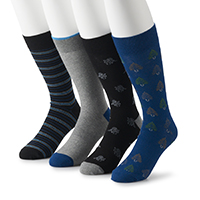

3678026.jpg


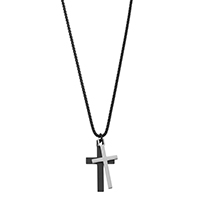

3944645_White_ALT3.jpg


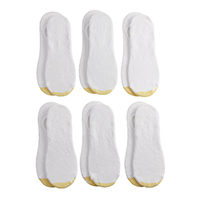

3758944_Navy.jpg


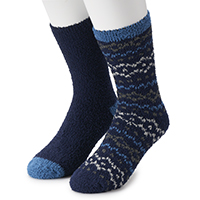

3953308.jpg


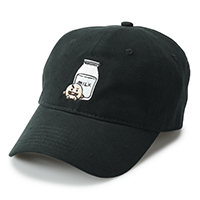

In [67]:
rand5 = np.random.randint(0,len(bucket0),5)

print("Image examples Bucket0: ")
for i in rand5:
    print(bucket0[i])
    display(_Imgdis(filename=path + bucket0[i], width=200, height=200))

Image examples Bucket1: 
3687203_Dark_Storm_Heather.jpg


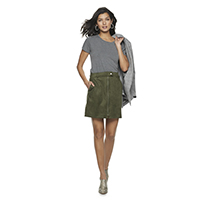

3721375_Black_ALT2.jpg


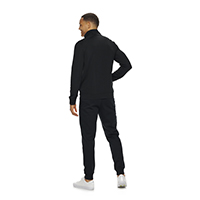

3804469_Marine_Blue.jpg


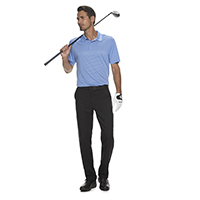

3849481_Charcoal_ALT.jpg


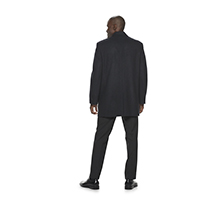

3737418_Loden.jpg


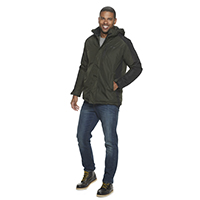

In [68]:
rand5 = np.random.randint(0,len(bucket1),5)

print("Image examples Bucket1: ")
for i in rand5:
    print(bucket1[i])
    display(_Imgdis(filename=path + bucket1[i], width=200, height=200))

### Create lists of file groupings GMM

In [76]:
filenameIndex = images_df.index

In [77]:
gmm_preds = {}
i = 0
for file in filenameIndex:
  gmm_preds[file] = gmm_umap50[i]
  i +=1

In [78]:

bucket0 = []
bucket1 = []
bucket2 = []
bucket3 = []
bucket4 = []
for file in filenameIndex:
  if gmm_preds[file] == 0:
    bucket0.append(file)
  if gmm_preds[file] == 1:
    bucket1.append(file)
  if gmm_preds[file] == 2:
    bucket2.append(file)
  if gmm_preds[file] == 3:
    bucket3.append(file)
  if gmm_preds[file] == 4:
    bucket4.append(file)  

#### Test Examples

Image examples Bucket0: 
3947818_Dragonfly_Print.jpg


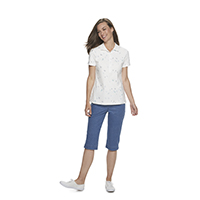

3681352_Green_Buffalo.jpg


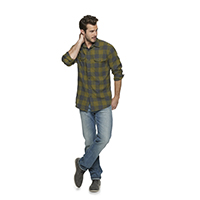

3680724_Navy.jpg


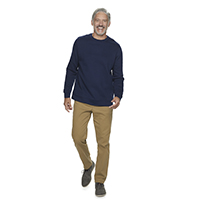

3841927_Firefly.jpg


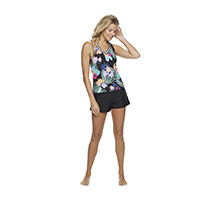

3862870_Aqua.jpg


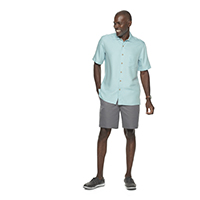

In [79]:
rand5 = np.random.randint(0,len(bucket0),5)

print("Image examples Bucket0: ")
for i in rand5:
    print(bucket0[i])
    display(_Imgdis(filename=path + bucket0[i], width=200, height=200))

Image examples Bucket1: 
3763748_Bear.jpg


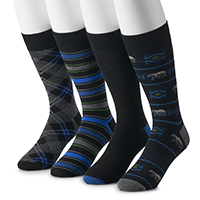

3953293_Black.jpg


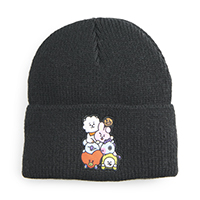

3921685.jpg


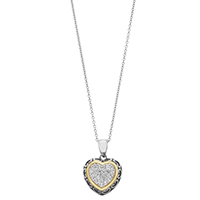

3700970_Blue_Rainbow.jpg


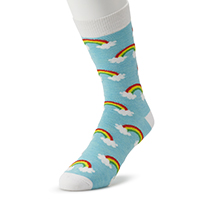

3887270_ALT3.jpg


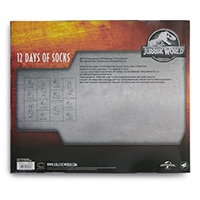

In [80]:
rand5 = np.random.randint(0,len(bucket1),5)

print("Image examples Bucket1: ")
for i in rand5:
    print(bucket1[i])
    display(_Imgdis(filename=path + bucket1[i], width=200, height=200))

In [ ]:
rand5 = np.random.randint(0,len(bucket2),5)

print("Image examples Bucket1: ")
for i in rand5:
    print(bucket2[i])
    display(_Imgdis(filename=path + bucket2[i], width=200, height=200))

# RGB

## Setup data

In [ ]:
images_df = images_df.drop(columns='filename')

In [39]:
X = images_df
X_std = X.div(255)


### t-SNE Tuning

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2008 samples in 1.627s...
[t-SNE] Computed neighbors for 2008 samples in 76.059s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 2.424148
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.903458
[t-SNE] KL divergence after 1000 iterations: 1.077506
--- 1 minutes 29.009334087371826 seconds ---


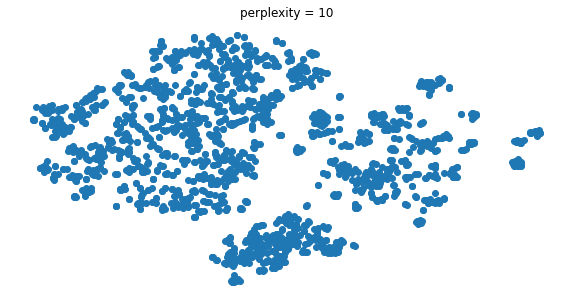

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2008 samples in 1.837s...
[t-SNE] Computed neighbors for 2008 samples in 76.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 2.873379
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.752029
[t-SNE] KL divergence after 1000 iterations: 1.047722
--- 1 minutes 31.083812713623047 seconds ---


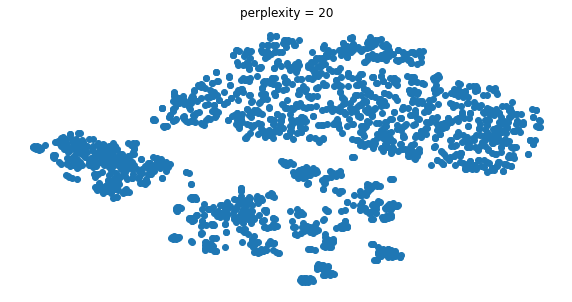

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2008 samples in 1.847s...
[t-SNE] Computed neighbors for 2008 samples in 75.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 3.148954
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.534668
[t-SNE] KL divergence after 1000 iterations: 1.009123
--- 1 minutes 32.18467569351196 seconds ---


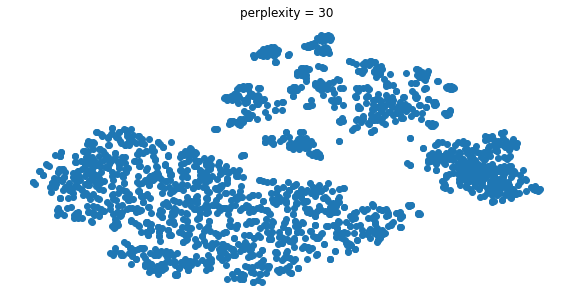

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2008 samples in 1.842s...
[t-SNE] Computed neighbors for 2008 samples in 75.813s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 3.361989
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.443878
[t-SNE] KL divergence after 1000 iterations: 0.966189
--- 1 minutes 34.39216089248657 seconds ---


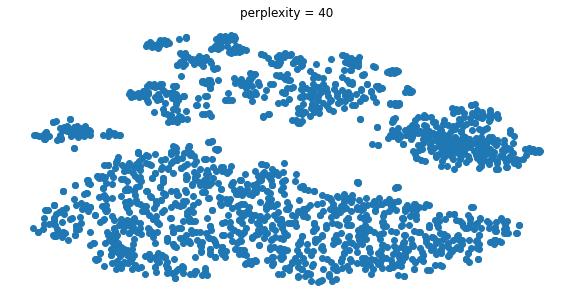

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2008 samples in 1.902s...
[t-SNE] Computed neighbors for 2008 samples in 75.883s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 3.544119
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.993896
[t-SNE] KL divergence after 1000 iterations: 0.933471
--- 1 minutes 35.410897970199585 seconds ---


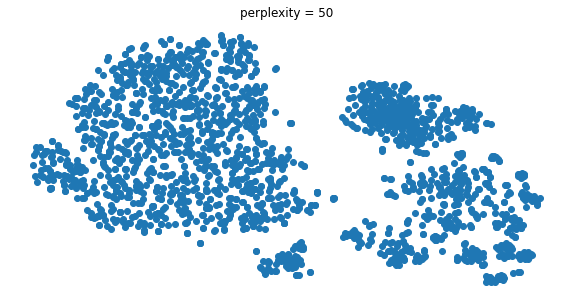

In [ ]:
for i in range (10,60,10):
  start_time = time.time()

  tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=1000)
  tsne_results = tsne.fit_transform(X_std)

  stop_clock()

  plt.figure(figsize=(10,5))
  plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.title('perplexity = {}'.format(i))
  plt.show()

In [15]:
tsne_opt = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000)
X_tsne = tsne_opt.fit_transform(X_std)
X_tsne3 = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_std)


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2008 samples in 1.862s...
[t-SNE] Computed neighbors for 2008 samples in 76.341s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 3.544119
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.958565
[t-SNE] KL divergence after 1000 iterations: 0.933662
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2008 samples in 2.004s...
[t-SNE] Computed neighbors for 2008 samples in 76.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2008
[t-SNE] Computed conditional probabilities for sample 2000 / 2008
[t-SNE] Computed conditional probabilities for sample 2008 / 2008
[t-SNE] Mean sigma: 3.544119
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.094772
[t-SNE] KL divergence after 1000 iterations: 0.753

### UMAP tuning


--- 1 minutes 3.628819227218628 seconds ---


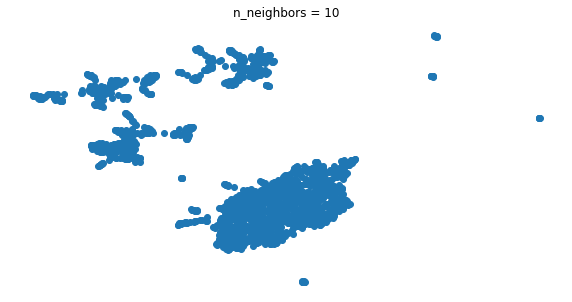

--- 1 minutes 4.167669057846069 seconds ---


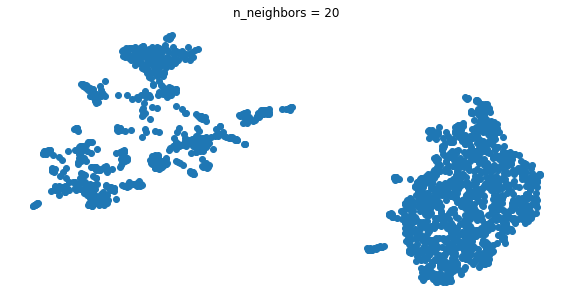

--- 1 minutes 4.7550132274627686 seconds ---


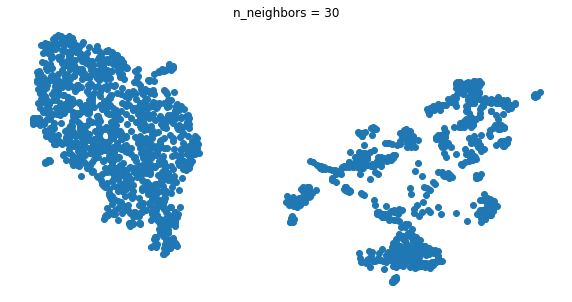

--- 1 minutes 5.388295888900757 seconds ---


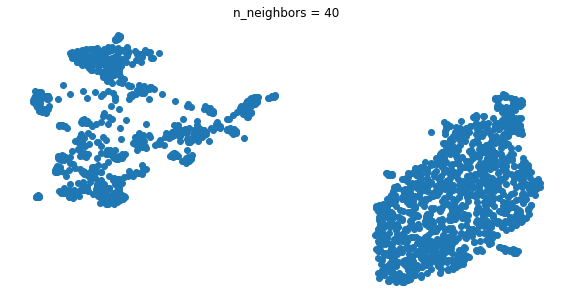

--- 1 minutes 6.191008806228638 seconds ---


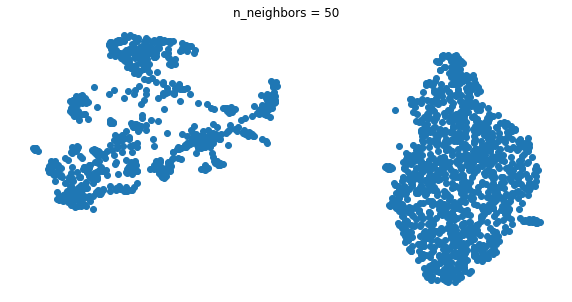

--- 1 minutes 6.542141675949097 seconds ---


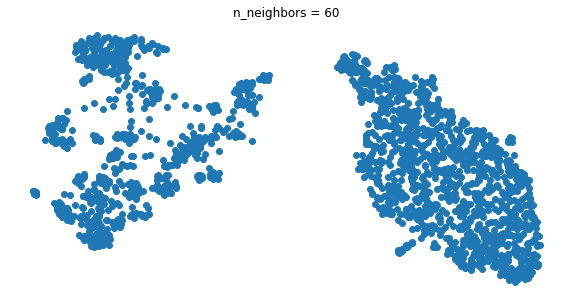

--- 1 minutes 6.155279874801636 seconds ---


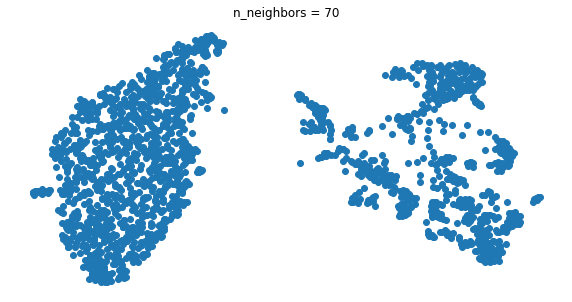

--- 1 minutes 6.603993654251099 seconds ---


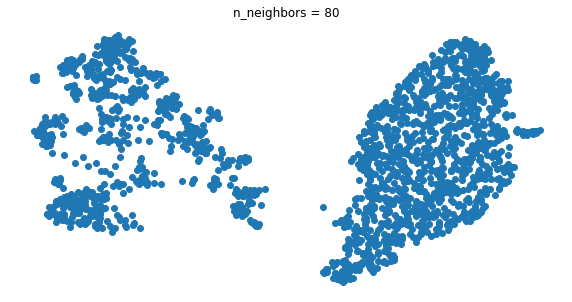

--- 1 minutes 6.669778823852539 seconds ---


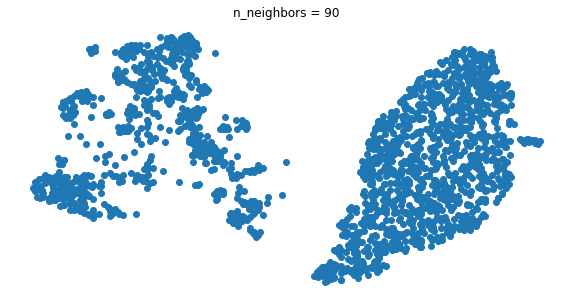

--- 1 minutes 7.919685125350952 seconds ---


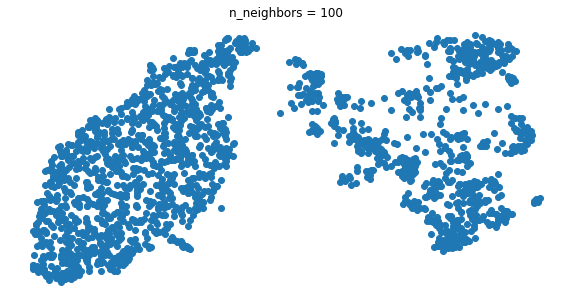

--- 1 minutes 7.140796184539795 seconds ---


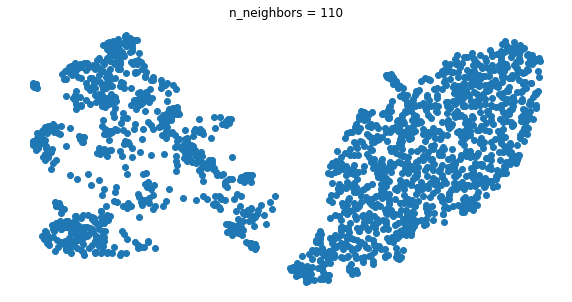

--- 1 minutes 7.352409601211548 seconds ---


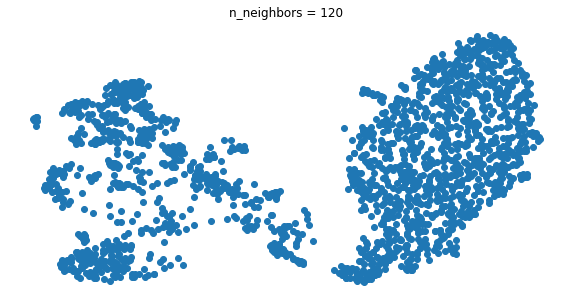

--- 1 minutes 7.764647006988525 seconds ---


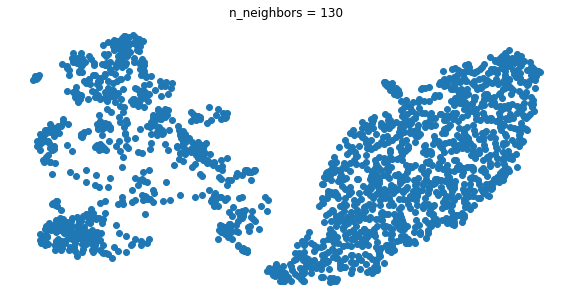

--- 1 minutes 7.818577527999878 seconds ---


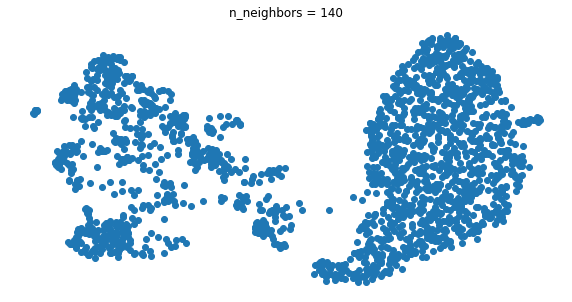

--- 1 minutes 11.361295461654663 seconds ---


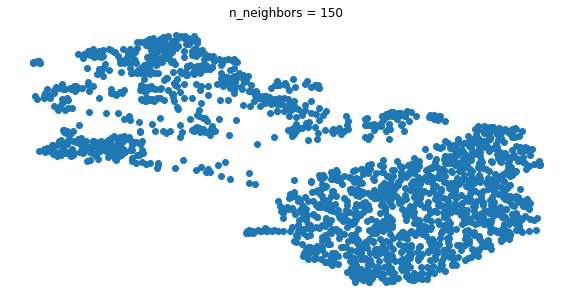

--- 1 minutes 7.881101131439209 seconds ---


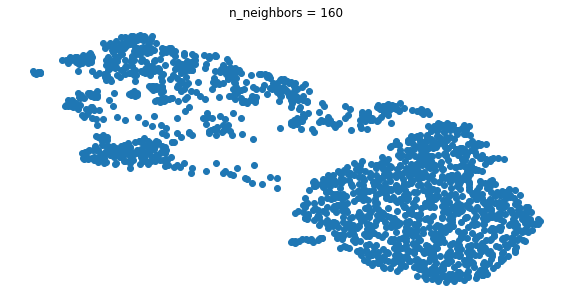

--- 1 minutes 8.224087715148926 seconds ---


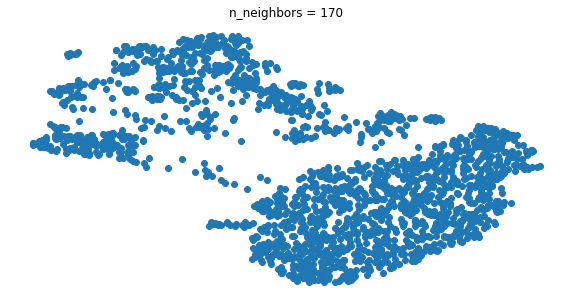

--- 1 minutes 8.372364282608032 seconds ---


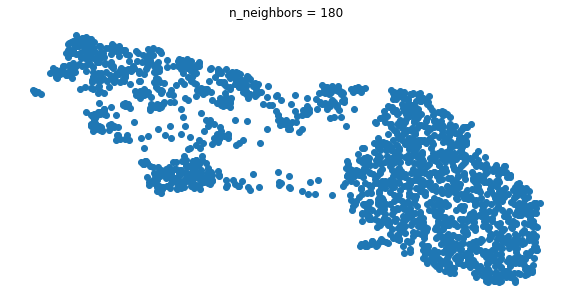

--- 1 minutes 9.067786693572998 seconds ---


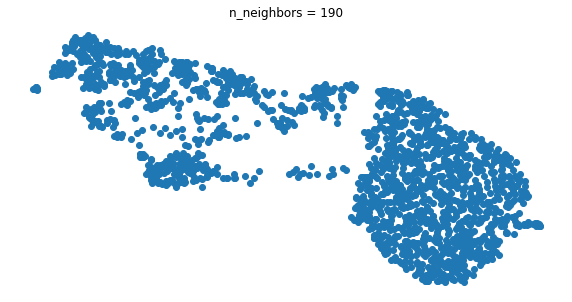

--- 1 minutes 11.489703893661499 seconds ---


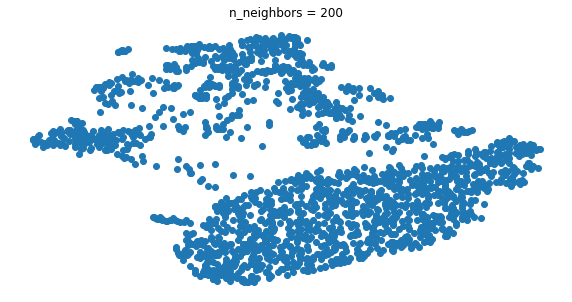

--- 1 minutes 9.335050821304321 seconds ---


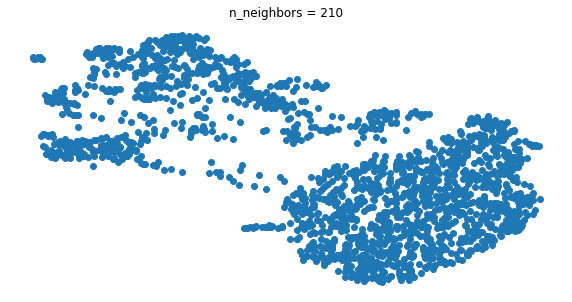

--- 1 minutes 9.249563217163086 seconds ---


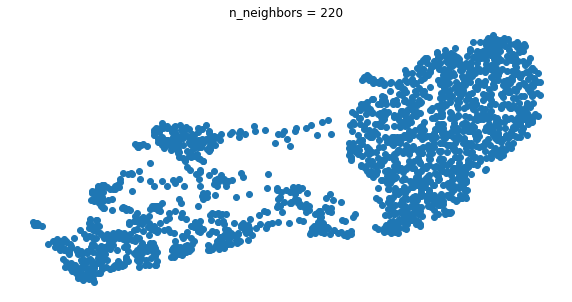

--- 1 minutes 9.143033266067505 seconds ---


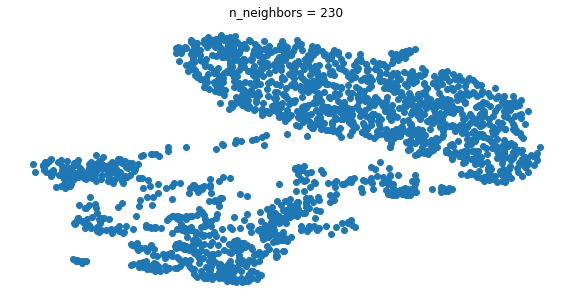

--- 1 minutes 10.549277544021606 seconds ---


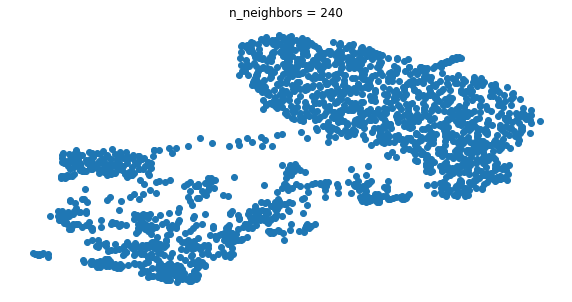

In [ ]:
for i in range (10,250,10):
  start_time = time.time()

  umap_results = umap.UMAP(n_neighbors=i, min_dist=0.3, metric='correlation').fit_transform(X_std)

  stop_clock()

  plt.figure(figsize=(10,5))
  plt.scatter(umap_results[:, 0], umap_results[:, 1])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.title('n_neighbors = {}'.format(i))
  plt.show()

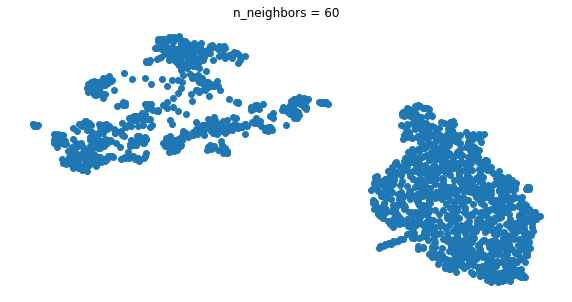

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.title('n_neighbors = 60')
plt.show()

In [40]:
X_umap = umap.UMAP(n_neighbors=60, min_dist=0.3, metric='correlation').fit_transform(X_std)
X_umap10 = umap.UMAP(n_neighbors=60, min_dist=0.3, n_components=10, metric='correlation').fit_transform(X_std)
X_umap50 = umap.UMAP(n_neighbors=60, min_dist=0.3, n_components=50, metric='correlation').fit_transform(X_std)

## Model Testing

### DBSCAN

All pixels

In [ ]:
for i in range (2,5):
  for j in range (5,10):
    dbscan_cluster = DBSCAN(eps=i, min_samples=j)
    db_clusters = dbscan_cluster.fit_predict(X_std)
    print("eps = {}, min samples = {}".format(i,j))
    print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std, db_clusters, metric='euclidean')))

eps = 2, min samples = 5
The silhouette score of the DBSCAN solution: -0.27356940195194523
eps = 2, min samples = 6
The silhouette score of the DBSCAN solution: -0.27396430454024273
eps = 2, min samples = 7
The silhouette score of the DBSCAN solution: -0.2662456944511562
eps = 2, min samples = 8
The silhouette score of the DBSCAN solution: -0.1512386208398757
eps = 2, min samples = 9
The silhouette score of the DBSCAN solution: -0.15275221187172158
eps = 3, min samples = 5
The silhouette score of the DBSCAN solution: -0.24711309522928313
eps = 3, min samples = 6
The silhouette score of the DBSCAN solution: -0.23704923851658455
eps = 3, min samples = 7
The silhouette score of the DBSCAN solution: -0.2035447069445799
eps = 3, min samples = 8
The silhouette score of the DBSCAN solution: -0.20433677081585025
eps = 3, min samples = 9
The silhouette score of the DBSCAN solution: -0.08731975889137107
eps = 4, min samples = 5
The silhouette score of the DBSCAN solution: -0.19568267308089088
ep

In [ ]:
dbscan_cluster_opt = DBSCAN(eps=2, min_samples=6)
db_clusters_opt = dbscan_cluster_opt.fit_predict(X_std)
print("Number of clusters with best settings is: {}".format(len(np.unique(db_clusters_opt))))

Number of clusters with best settings is: 5


t-SNE

In [ ]:
for i in range (2,5):
  for j in range (5,10):
    dbscan_cluster = DBSCAN(eps=i, min_samples=j)
    db_clusters = dbscan_cluster.fit_predict(X_tsne)
    print("eps = {}, min samples = {}".format(i,j))
    print("The silhouette score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_tsne, db_clusters, metric='euclidean')))

eps = 2, min samples = 5
The silhouette score of the DBSCAN solution: 0.045902352780103683
eps = 2, min samples = 6
The silhouette score of the DBSCAN solution: 0.07480797171592712
eps = 2, min samples = 7
The silhouette score of the DBSCAN solution: 0.12082435190677643
eps = 2, min samples = 8
The silhouette score of the DBSCAN solution: 0.02815813384950161
eps = 2, min samples = 9
The silhouette score of the DBSCAN solution: -0.11265864968299866
eps = 3, min samples = 5
The silhouette score of the DBSCAN solution: 0.14012008905410767
eps = 3, min samples = 6
The silhouette score of the DBSCAN solution: 0.23732413351535797
eps = 3, min samples = 7
The silhouette score of the DBSCAN solution: 0.23890018463134766
eps = 3, min samples = 8
The silhouette score of the DBSCAN solution: 0.27558717131614685
eps = 3, min samples = 9
The silhouette score of the DBSCAN solution: 0.24891243875026703
eps = 4, min samples = 5
The silhouette score of the DBSCAN solution: 0.2925758957862854
eps = 4, 

In [ ]:
dbscan_cluster_tsne = DBSCAN(eps=4, min_samples=8)
db_clusters_tsne = dbscan_cluster_tsne.fit_predict(X_tsne)
print("Number of clusters with best settings is: {}".format(len(np.unique(db_clusters_tsne))))

Number of clusters with best settings is: 5


UMAP

In [ ]:
for i in range (2,10):
  dbscan_cluster = DBSCAN(eps=2, min_samples=i)
  db_clusters = dbscan_cluster.fit_predict(X_umap)
  print("min samples = {}".format(i))
  print("The silhouette score of the DBSCAN with UMAP solution: {}".format(metrics.silhouette_score(X_umap, db_clusters, metric='euclidean')))

min samples = 2
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 3
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 4
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 5
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 6
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 7
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 8
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335
min samples = 9
The silhouette score of the DBSCAN with UMAP solution: 0.6238473653793335


In [ ]:
dbscan_cluster_umap = DBSCAN(eps=2, min_samples=9)
db_clusters_umap = dbscan_cluster_tsne.fit_predict(X_umap)
print("Number of clusters with best settings is: {}".format(len(np.unique(db_clusters_umap))))

Number of clusters with best settings is: 1


### Agglomerative Clustering

In [ ]:
for i in range (2,15):
  pred = AgglomerativeClustering(linkage='complete', affinity='cosine', n_clusters=i).fit_predict(X_std)
  print("The silhoutte score for {} clusters Agglomerative Clustering solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering solution: 0.46273464926225866
The silhoutte score for 3 clusters Agglomerative Clustering solution: 0.08055139184736294
The silhoutte score for 4 clusters Agglomerative Clustering solution: 0.07731160627310205
The silhoutte score for 5 clusters Agglomerative Clustering solution: 0.08438300528501971
The silhoutte score for 6 clusters Agglomerative Clustering solution: 0.0833095998654547
The silhoutte score for 7 clusters Agglomerative Clustering solution: 0.08325003201858691
The silhoutte score for 8 clusters Agglomerative Clustering solution: 0.10951280433380157
The silhoutte score for 9 clusters Agglomerative Clustering solution: 0.11024837780307313
The silhoutte score for 10 clusters Agglomerative Clustering solution: 0.1109412925001273
The silhoutte score for 11 clusters Agglomerative Clustering solution: 0.10922373842179826
The silhoutte score for 12 clusters Agglomerative Clustering solution: 0.10946754594582396
The silho

In [ ]:
for i in range (2,15):
  pred = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=i).fit_predict(X_std)
  print("The silhoutte score for {} clusters Agglomerative Clustering solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering solution: 0.46959695700249654
The silhoutte score for 3 clusters Agglomerative Clustering solution: 0.46294469444162306
The silhoutte score for 4 clusters Agglomerative Clustering solution: 0.4580402990820237
The silhoutte score for 5 clusters Agglomerative Clustering solution: 0.4527357409713812
The silhoutte score for 6 clusters Agglomerative Clustering solution: 0.45091017691166746
The silhoutte score for 7 clusters Agglomerative Clustering solution: 0.39104055550663286
The silhoutte score for 8 clusters Agglomerative Clustering solution: 0.36532497097507705
The silhoutte score for 9 clusters Agglomerative Clustering solution: 0.36230133399109304
The silhoutte score for 10 clusters Agglomerative Clustering solution: 0.36026568384951124
The silhoutte score for 11 clusters Agglomerative Clustering solution: 0.3960766407761105
The silhoutte score for 12 clusters Agglomerative Clustering solution: 0.37713105700543564
The silhou

In [ ]:
for i in range (2,15):
  pred = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=i).fit_predict(X_std)
  print("The silhoutte score for {} clusters Agglomerative Clustering solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering solution: 0.36727469132413737
The silhoutte score for 3 clusters Agglomerative Clustering solution: 0.13277167481828003
The silhoutte score for 4 clusters Agglomerative Clustering solution: 0.13148890128454352
The silhoutte score for 5 clusters Agglomerative Clustering solution: 0.11592262917183004
The silhoutte score for 6 clusters Agglomerative Clustering solution: 0.11724199408043298
The silhoutte score for 7 clusters Agglomerative Clustering solution: 0.12131676124598596
The silhoutte score for 8 clusters Agglomerative Clustering solution: 0.12361953633046867
The silhoutte score for 9 clusters Agglomerative Clustering solution: 0.1267800519027252
The silhoutte score for 10 clusters Agglomerative Clustering solution: 0.1081966015587283
The silhoutte score for 11 clusters Agglomerative Clustering solution: 0.11006597551940771
The silhoutte score for 12 clusters Agglomerative Clustering solution: 0.11565509381301751
The silho

t-SNE

In [ ]:
for i in range (2,15):
  pred = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=i).fit_predict(X_tsne)
  print("The silhoutte score for {} clusters Agglomerative Clustering with t-SNE solution: {}".format(i, metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering with t-SNE solution: 0.4586215615272522
The silhoutte score for 3 clusters Agglomerative Clustering with t-SNE solution: 0.42467278242111206
The silhoutte score for 4 clusters Agglomerative Clustering with t-SNE solution: 0.39462801814079285
The silhoutte score for 5 clusters Agglomerative Clustering with t-SNE solution: 0.3891511559486389
The silhoutte score for 6 clusters Agglomerative Clustering with t-SNE solution: 0.36541828513145447
The silhoutte score for 7 clusters Agglomerative Clustering with t-SNE solution: 0.3456413745880127
The silhoutte score for 8 clusters Agglomerative Clustering with t-SNE solution: 0.323486864566803
The silhoutte score for 9 clusters Agglomerative Clustering with t-SNE solution: 0.30385786294937134
The silhoutte score for 10 clusters Agglomerative Clustering with t-SNE solution: 0.25818660855293274
The silhoutte score for 11 clusters Agglomerative Clustering with t-SNE solution: 0.23460471630

UMAP


In [ ]:
for i in range (2,15):
  pred = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=i).fit_predict(X_umap)
  print("The silhoutte score for {} clusters Agglomerative Clustering with t-SNE solution: {}".format(i, metrics.silhouette_score(X_umap, pred, metric='euclidean')))

The silhoutte score for 2 clusters Agglomerative Clustering with t-SNE solution: 0.2634761333465576
The silhoutte score for 3 clusters Agglomerative Clustering with t-SNE solution: 0.434237539768219
The silhoutte score for 4 clusters Agglomerative Clustering with t-SNE solution: 0.3732622563838959
The silhoutte score for 5 clusters Agglomerative Clustering with t-SNE solution: 0.367803692817688
The silhoutte score for 6 clusters Agglomerative Clustering with t-SNE solution: 0.3343917429447174
The silhoutte score for 7 clusters Agglomerative Clustering with t-SNE solution: 0.310757577419281
The silhoutte score for 8 clusters Agglomerative Clustering with t-SNE solution: 0.31164658069610596
The silhoutte score for 9 clusters Agglomerative Clustering with t-SNE solution: 0.3034532964229584
The silhoutte score for 10 clusters Agglomerative Clustering with t-SNE solution: 0.2900238633155823
The silhoutte score for 11 clusters Agglomerative Clustering with t-SNE solution: 0.28359347581863403

### GMM

In [19]:
for i in range (2,4):
  pred = GaussianMixture(n_components=i, random_state=42).fit_predict(X_std)
  print("The silhoutte score for {} components GMM solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for 2 components GMM solution: 0.4148701393911943
The silhoutte score for 3 components GMM solution: 0.15573983689038307


In [31]:
gmm_opt = GaussianMixture(n_components=2, random_state=42).fit_predict(X_std)
print("The silhoutte score for GMM solution: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))

The silhoutte score for GMM solution: 9


In [20]:
for i in range (2,4):
  pred = GaussianMixture(n_components=i, random_state=42).fit_predict(X_tsne)
  print("The silhoutte score for {} components GMM solution: {}".format(i, metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

The silhoutte score for 2 components GMM solution: 0.466948539018631
The silhoutte score for 3 components GMM solution: 0.39291033148765564


In [30]:
gmm_tsne = GaussianMixture(n_components=2, random_state=42).fit_predict(X_tsne)
print("The silhoutte score for GMM with tSNE solution : {}".format(i, metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

The silhoutte score for GMM with tSNE solution : 9


In [18]:
for i in range (2,4):
  pred = GaussianMixture(n_components=i, random_state=42).fit_predict(X_umap)
  print("The silhoutte score for {} components GMM solution: {}".format(i, metrics.silhouette_score(X_umap, pred, metric='euclidean')))

The silhoutte score for 2 components GMM solution: 0.6400316953659058
The silhoutte score for 3 components GMM solution: 0.467424601316452


In [21]:
gmm_umap = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap)
print("The silhoutte score for the GMM with UMAP solution: {}".format(metrics.silhouette_score(X_umap, gmm_umap, metric='euclidean')))

The silhoutte score for the GMM with UMAP solution: 0.6400316953659058


### KMeans

In [22]:
for i in range (2,10):
  pred = KMeans(n_clusters=i, random_state=42, max_iter=1000).fit_predict(X_std)
  print("Silhouette score for {} cluster k-means: {}".format(i, metrics.silhouette_score(X_std, pred, metric='euclidean')))


Silhouette score for 2 cluster k-means: 0.4148701393911943
Silhouette score for 3 cluster k-means: 0.15570788651721004
Silhouette score for 4 cluster k-means: 0.14696071895017157
Silhouette score for 5 cluster k-means: 0.1423500443147082
Silhouette score for 6 cluster k-means: 0.1444818399990359
Silhouette score for 7 cluster k-means: 0.13706719457687058
Silhouette score for 8 cluster k-means: 0.1397579962990325
Silhouette score for 9 cluster k-means: 0.12008894182934912


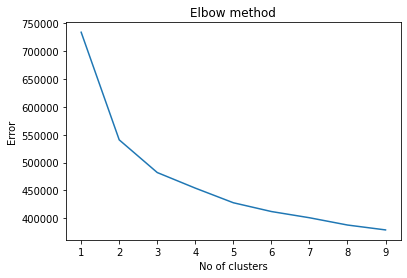

In [23]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X_std)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [24]:
pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_std)
print("Silhouette score k-means: {}".format(metrics.silhouette_score(X_std, pred, metric='euclidean')))

Silhouette score k-means: 0.15570788651721004


In [25]:
pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_std)
print("Silhouette score k-means: {}".format(metrics.silhouette_score(X_std, pred, metric='euclidean')))


Silhouette score k-means: 0.4148701393911943


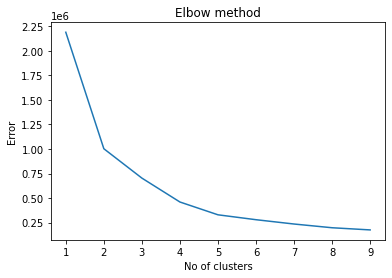

In [26]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X_tsne)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [27]:
pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_tsne)
print("Silhouette score k-means with t-SNE: {}".format(metrics.silhouette_score(X_tsne, pred, metric='euclidean')))

Silhouette score k-means with t-SNE: 0.42288821935653687


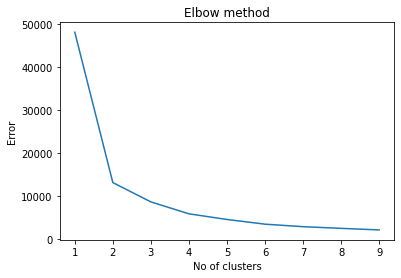

In [28]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(X_umap)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [29]:
pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_umap)
print("Silhouette score k-means with UMAP: {}".format(metrics.silhouette_score(X_umap, pred, metric='euclidean')))

Silhouette score k-means with UMAP: 0.523205041885376


## Best Predictors

In [43]:
agg_umap = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=3).fit_predict(X_umap)

gmm_umap = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap)



print("The silhoutte score for the Agglomerative solution: {}".format(metrics.silhouette_score(X_umap, agg_umap, metric='euclidean')))
print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap, gmm_umap, metric='euclidean')))


The silhoutte score for the Agglomerative solution: 0.34400245547294617
The silhoutte score for the GMM solution: 0.6534724235534668


In [153]:
agg_umap10 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2).fit_predict(X_umap10)

gmm_umap10 = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap10)



print("The silhoutte score for the Agglomerative solution: {}".format(metrics.silhouette_score(X_umap10, agg_umap10, metric='euclidean')))
print("Number of clusters with best settings is: {}".format(len(np.unique(gmm_umap10))))
print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap10, gmm_umap10, metric='euclidean')))


The silhoutte score for the Agglomerative solution: 0.6516909003257751
Number of clusters with best settings is: 2
The silhoutte score for the GMM solution: 0.6516909003257751


In [44]:
agg_umap50 = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=2).fit_predict(X_umap50)

gmm_umap50 = GaussianMixture(n_components=2, random_state=42).fit_predict(X_umap50)



print("The silhoutte score for the Agglomerative solution: {}".format(metrics.silhouette_score(X_umap50, agg_umap50, metric='euclidean')))

print("Number of clusters with best settings is: {}".format(len(np.unique(gmm_umap50))))

print("The silhoutte score for the GMM solution: {}".format(metrics.silhouette_score(X_umap50, gmm_umap50, metric='euclidean')))


The silhoutte score for the Agglomerative solution: 0.6528956294059753
Number of clusters with best settings is: 2
The silhoutte score for the GMM solution: 0.6528956294059753


### Create lists of file groupings AGG

In [45]:
filenameIndex = images_df.index

In [46]:
agg_preds = {}
i = 0
for file in filenameIndex:
  agg_preds[file] = agg_umap50[i]
  i +=1

In [47]:
bucket0 = []
bucket1 = []
bucket2 = []
bucket3 = []
bucket4 = []
for file in filenameIndex:
  if agg_preds[file] == 0:
    bucket0.append(file)
  if agg_preds[file] == 1:
    bucket1.append(file)
  if agg_preds[file] == 2:
    bucket2.append(file)
  if agg_preds[file] == 3:
    bucket3.append(file)
  if agg_preds[file] == 4:
    bucket4.append(file)  

#### Test Examples

In [48]:
path = '/Users/minimac/Documents/Thinkful/Capstone3/imgDB/ProductImages/'

Image examples Bucket0: 
3942651.jpg


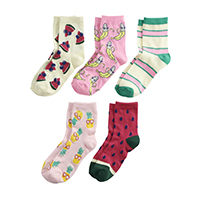

3945057.jpg


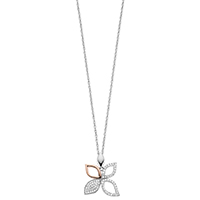

3767108_Yeti.jpg


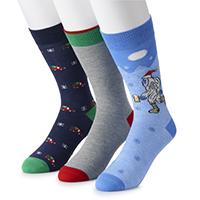

4133930.jpg


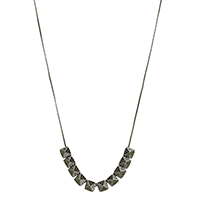

3919873.jpg


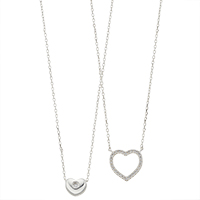

In [49]:
rand5 = np.random.randint(0,len(bucket0),5)

print("Image examples Bucket0: ")
for i in rand5:
    print(bucket0[i])
    display(_Imgdis(filename=path + bucket0[i], width=200, height=200))

Image examples Bucket1: 
3979888_Seton_Blue.jpg


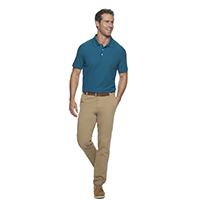

3947958_Ivory_Black_Animal.jpg


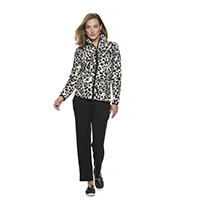

3870612_White_Dot.jpg


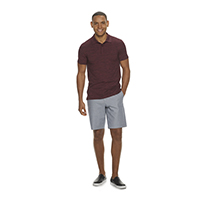

3793906_Gray.jpg


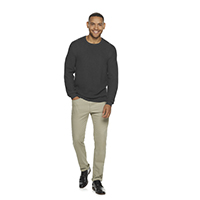

3841934_Firefly_ALT2.jpg


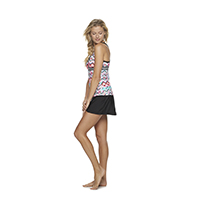

In [50]:
rand5 = np.random.randint(0,len(bucket1),5)

print("Image examples Bucket1: ")
for i in rand5:
    print(bucket1[i])
    display(_Imgdis(filename=path + bucket1[i], width=200, height=200))

In [ ]:
rand5 = np.random.randint(0,len(bucket2),5)

print("Image examples Bucket2: ")
for i in rand5:
    print(bucket2[i])
    display(_Imgdis(filename=path + bucket2[i], width=200, height=200))

### Create lists of file groupings GMM

In [ ]:
filenameIndex = images_df.index

In [51]:
gmm_preds = {}
i = 0
for file in filenameIndex:
  gmm_preds[file] = gmm_umap50[i]
  i +=1

In [52]:

bucket0 = []
bucket1 = []
bucket2 = []
bucket3 = []
bucket4 = []
for file in filenameIndex:
  if gmm_preds[file] == 0:
    bucket0.append(file)
  if gmm_preds[file] == 1:
    bucket1.append(file)
  if gmm_preds[file] == 2:
    bucket2.append(file)
  if gmm_preds[file] == 3:
    bucket3.append(file)
  if gmm_preds[file] == 4:
    bucket4.append(file)  

#### Test Examples

Image examples Bucket0: 
3862283_Gray_ALT.jpg


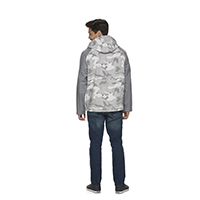

3641376_Peacoat.jpg


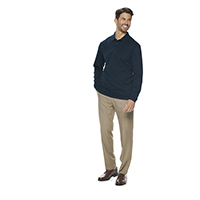

3717605_Hawke_Navy.jpg


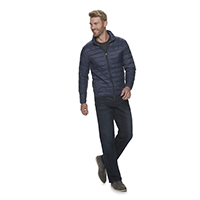

3926073_Bright_White_ALT.jpg


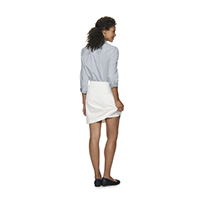

3674935_Black.jpg


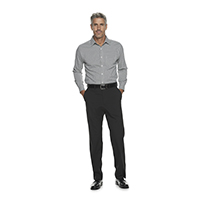

In [53]:
rand5 = np.random.randint(0,len(bucket0),5)

print("Image examples Bucket0: ")
for i in rand5:
    print(bucket0[i])
    display(_Imgdis(filename=path + bucket0[i], width=200, height=200))

Image examples Bucket1: 
3945083.jpg


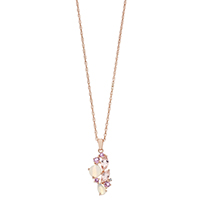

3853419.jpg


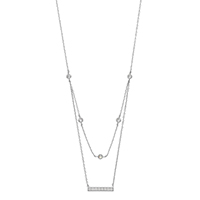

3914949_ALT.jpg


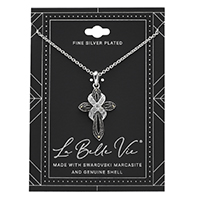

3910512.jpg


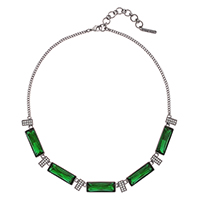

3700970_Blue_Sailboat.jpg


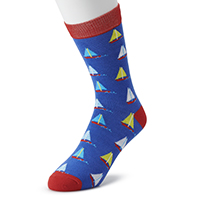

In [54]:
rand5 = np.random.randint(0,len(bucket1),5)

print("Image examples Bucket1: ")
for i in rand5:
    print(bucket1[i])
    display(_Imgdis(filename=path + bucket1[i], width=200, height=200))

In [ ]:
rand5 = np.random.randint(0,len(bucket2),5)

print("Image examples Bucket1: ")
for i in rand5:
    print(bucket2[i])
    display(_Imgdis(filename=path + bucket2[i], width=200, height=200))

# Conclusion

Total processing time for 2000 images was under 25 min



Converting to dataframe the most time intensive

Overall very effective for sorting into 2 - 3 groups